# K-means - clustering

The data used here comes from Kaggle: https://archive.ics.uci.edu/ml/datasets/wine

It includes 13 characteristics of wine and a variable called "Clusters", which is the classification provided by UCI and used here for comparison and validation purposes.


## Exploring Data

In [242]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

path = 'C:/Users/Katia/Documents/Machine learning'
os.chdir(path)

In [243]:
# read csv data 

# Check README for where you can find the data
df = pd.read_csv('wine_clustering_data1.csv', sep=';')

In [244]:
# Check dataset
df.head()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD/ODofdilutedwines,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [245]:
df.shape

(178, 14)

In [246]:
# Check descriptive statistics of continuous variables
df.describe()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD/ODofdilutedwines,Proline,Clusters
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.562297e+04,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,7.420359e+05,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000e+00,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000e+00,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000e+00,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000e+00,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,9.899999e+06,1.710000,4.000000,1680.000000,3.000000


In [247]:
# Check if there are any missing values
df.isnull().sum()

Alcohol                0
Malicacid              0
Ash                    0
Alcalinityofash        0
Magnesium              0
Totalphenols           0
Flavanoids             0
Nonflavanoidphenols    0
Proanthocyanins        0
Colorintensity         0
Hue                    0
OD/ODofdilutedwines    0
Proline                0
Clusters               0
dtype: int64

### Explore distributions

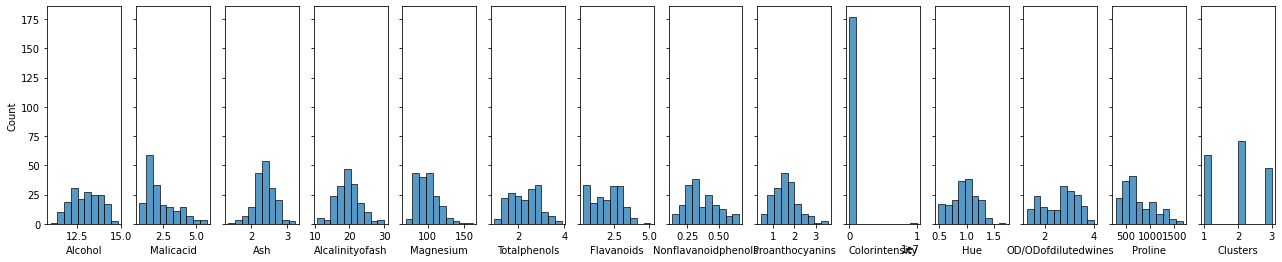

In [248]:
# Exploring distributions with histograms

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(1, 14, sharey=True, figsize = (22,4))

number = 1
for column in df: 
    ax_val = 'ax' + str(number)
    sns.histplot(df[column], bins =10, ax = eval(ax_val))
    number += 1

Because the original data already contains information about clusters (see "Clusters" variable), we can investigate whether they are visible in scatterplots. In a real-world unsupervised investigation, scatterplots can be visualized to see whether there are obvious clusters in the data.

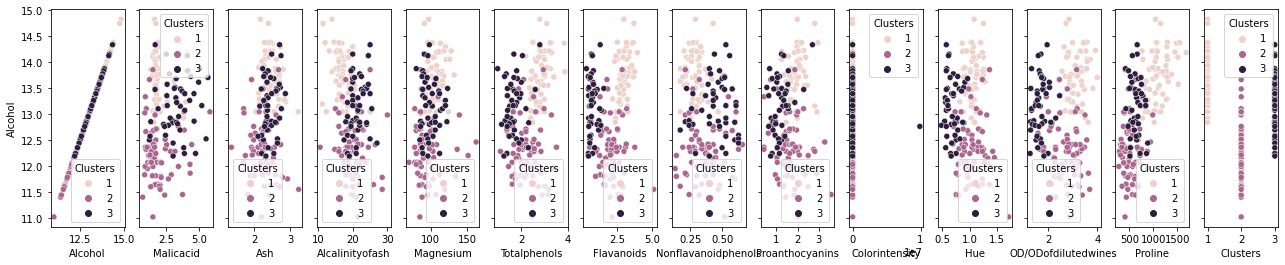

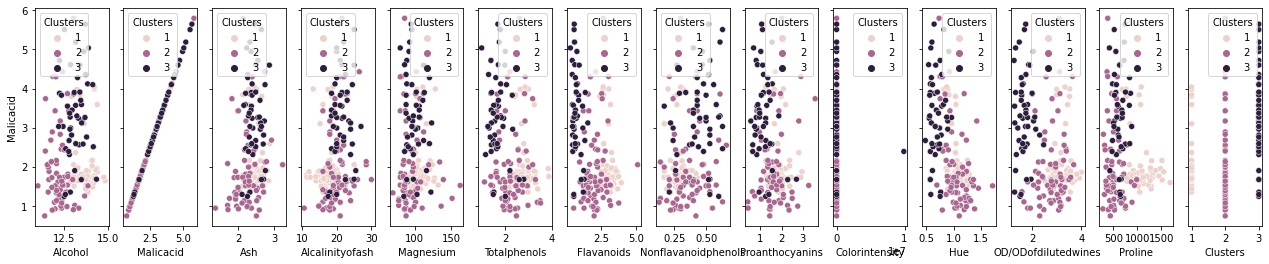

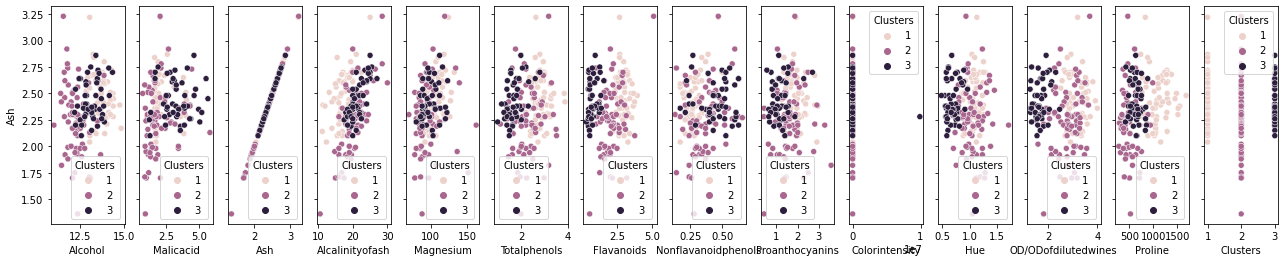

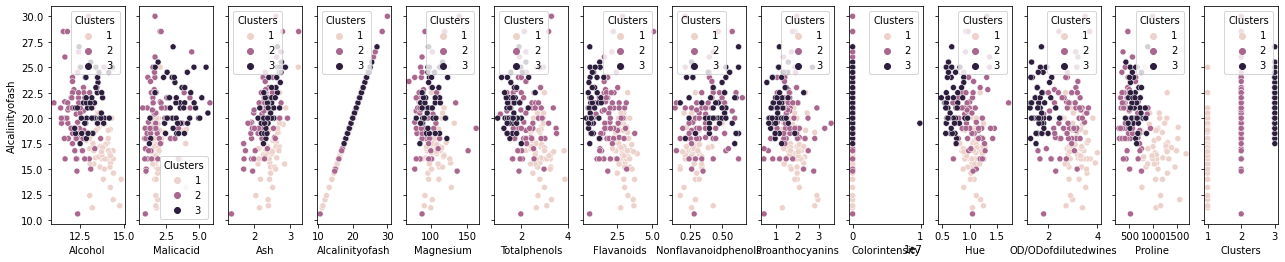

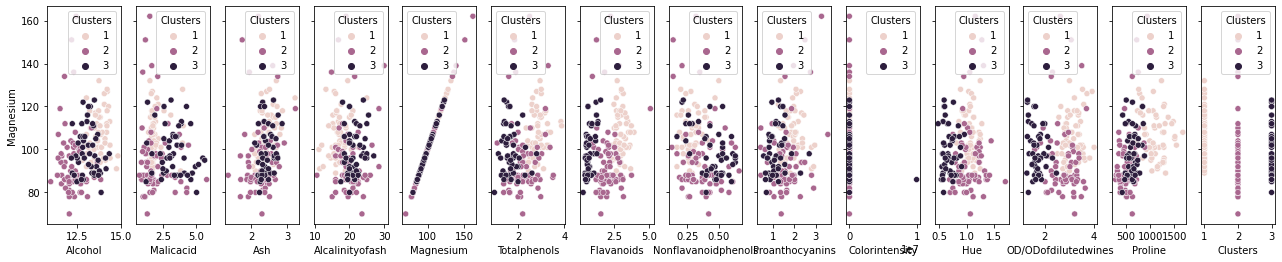

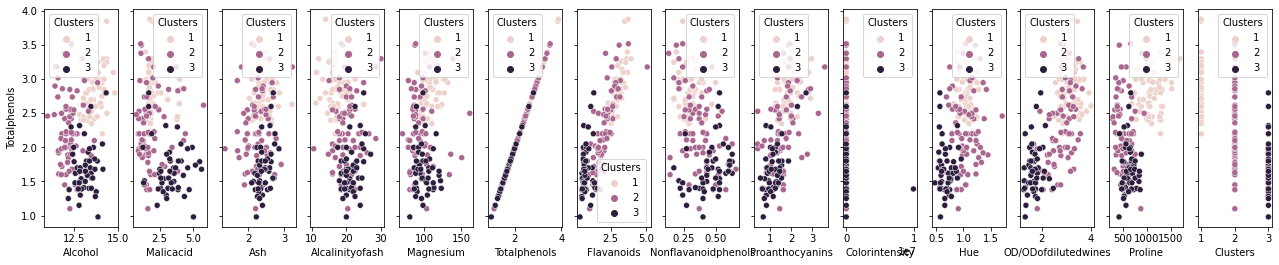

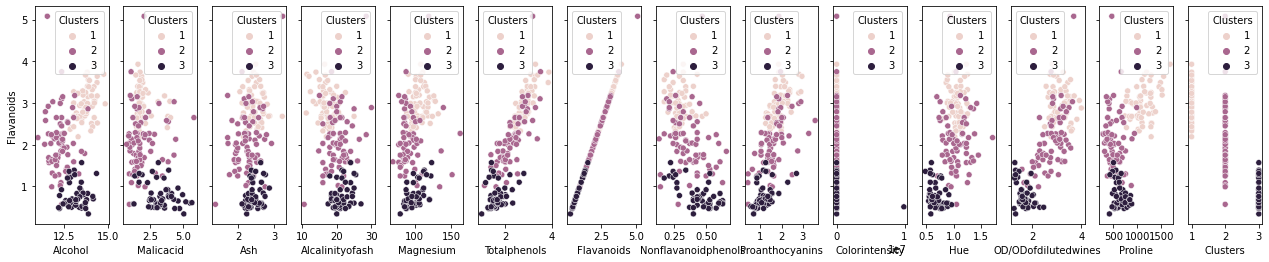

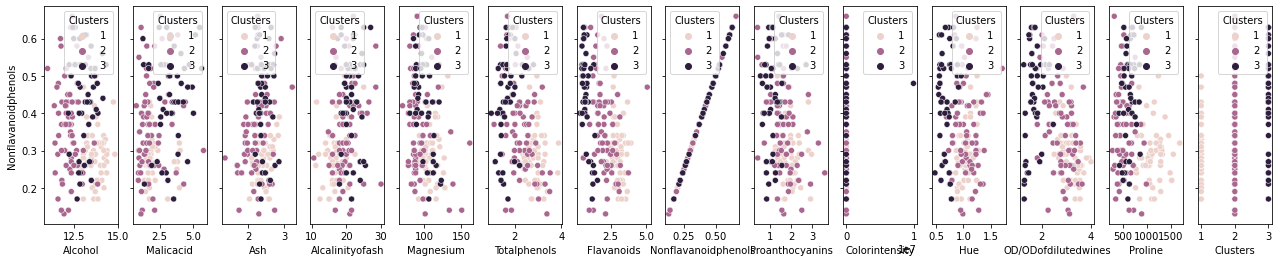

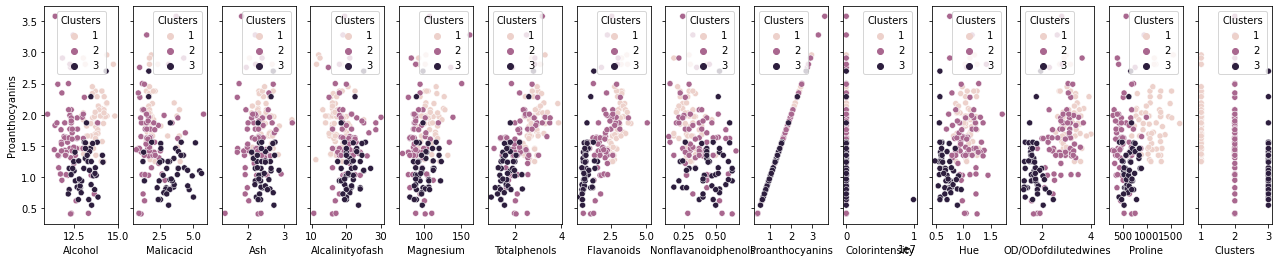

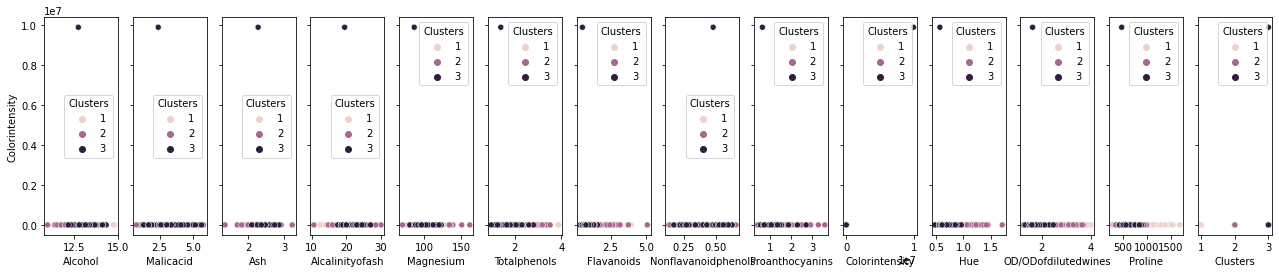

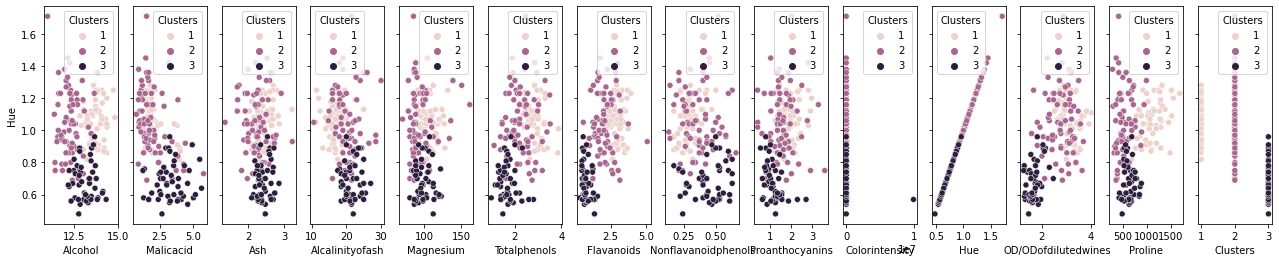

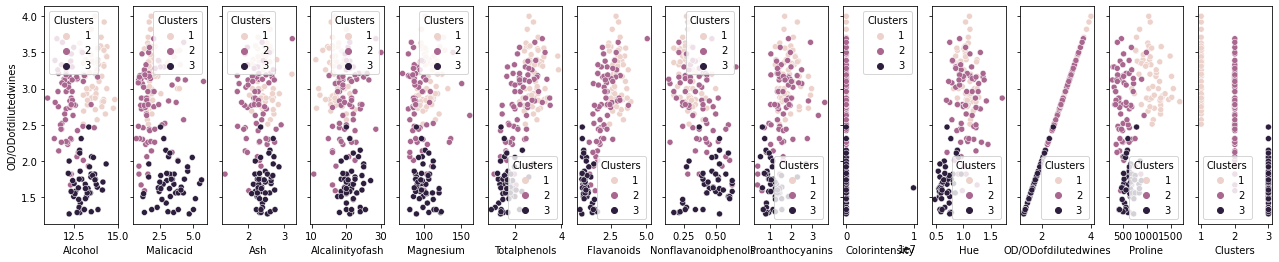

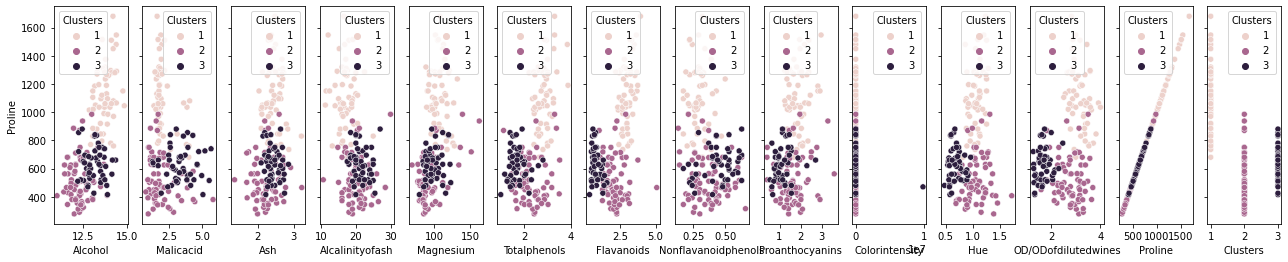

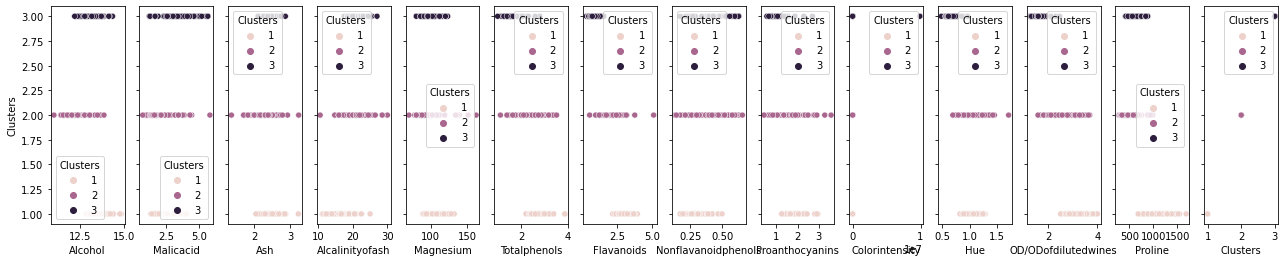

In [249]:
# Pairplot

for column in df: 
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(1, 14, sharey=True, figsize = (22,4))
    number = 1
    for column2 in df: 
        ax_val = 'ax' + str(number)
        sns.scatterplot(df[column2], df[column], hue= df['Clusters'], ax = eval(ax_val))
        number += 1


## Remove outliers

In [250]:
def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [251]:
for variable in df:
    outlier(variable)


Outlier caps for Alcohol:
  --95p: 14.2 / 9 values exceed that
  --3sd: 15.4 / 0 values exceed that
  --99p: 14.5 / 2 values exceed that

Outlier caps for Malicacid:
  --95p: 4.5 / 9 values exceed that
  --3sd: 5.7 / 1 values exceed that
  --99p: 5.5 / 2 values exceed that

Outlier caps for Ash:
  --95p: 2.7 / 9 values exceed that
  --3sd: 3.2 / 3 values exceed that
  --99p: 3.0 / 2 values exceed that

Outlier caps for Alcalinityofash:
  --95p: 25.0 / 7 values exceed that
  --3sd: 29.5 / 1 values exceed that
  --99p: 28.5 / 1 values exceed that

Outlier caps for Magnesium:
  --95p: 124.3 / 9 values exceed that
  --3sd: 142.5 / 2 values exceed that
  --99p: 141.8 / 2 values exceed that

Outlier caps for Totalphenols:
  --95p: 3.3 / 9 values exceed that
  --3sd: 4.2 / 0 values exceed that
  --99p: 3.6 / 2 values exceed that

Outlier caps for Flavanoids:
  --95p: 3.5 / 9 values exceed that
  --3sd: 5.0 / 1 values exceed that
  --99p: 3.8 / 2 values exceed that

Outlier caps for Nonflavan

In [252]:
# Remove outliers based on 99 quantile
for column in df:
    df[column].clip(upper=df[column].quantile(.99), inplace = True)

In [253]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD/ODofdilutedwines,Proline,Clusters
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.363865,19.486517,99.575955,2.292089,2.021252,0.361685,1.586445,5.064691,0.955729,2.610371,745.869213,1.938202
std,0.804575,1.111002,0.267036,3.314706,13.680946,0.618829,0.979667,0.124067,0.559125,2.331528,0.223969,0.707571,312.129198,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,12.037500,1.426900,3.843000,1522.360000,3.000000


## Check for multicollinearity

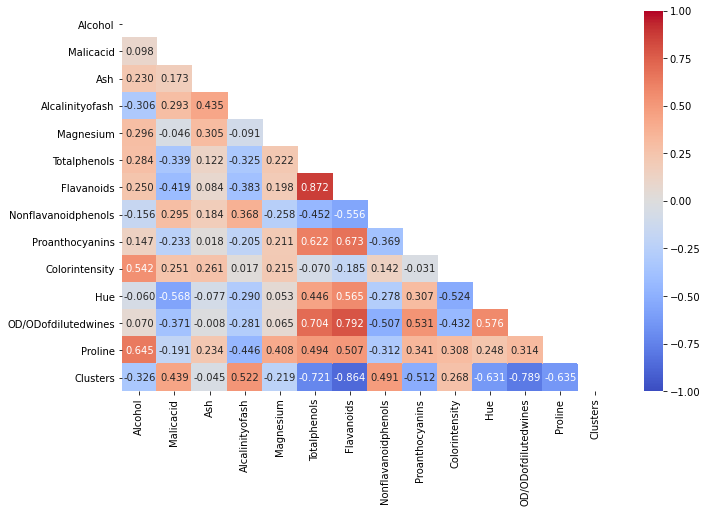

In [254]:
# Generate correlation matrix heat map (only useful for continuous variables)
plt.figure(figsize = (11, 7))

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

If a threshold is set at .7, either Totalphenols or Flavanoids and either OD/ODofdilutedwines and Totalphenols or Flavanoids should be removed.

In [255]:
# Drop one of the multicollinear variables

df = df.drop(['Totalphenols', 'OD/ODofdilutedwines'], axis = 1)
df.head()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,Proline,Clusters
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,735.0,1


## Scale variables

Variables must be scalled for K-means.

In [256]:
from sklearn.preprocessing import scale

#Scalling the data
X = df.drop('Clusters', axis = 1)
X = scale(X)
y = pd.DataFrame(df.Clusters)
X[0:10]

array([[ 1.53674123, -0.56350501,  0.24836156, -1.17581482,  2.01019754,
         1.06329873, -0.66025462,  1.26186357,  0.24744796,  0.37732304,
         1.02531586],
       [ 0.25295153, -0.50032112, -0.84069923, -2.50697725,  0.03108273,
         0.75620835, -0.82191256, -0.54962537, -0.29449461,  0.42209811,
         0.97712327],
       [ 0.20309562,  0.02320259,  1.14965324, -0.26820407,  0.10438328,
         1.24755296, -0.49859668,  2.19451134,  0.26465249,  0.33254797,
         1.41085654],
       [ 1.71123692, -0.34687451,  0.5112383 , -0.81277052,  0.98398986,
         1.50346161, -0.9835705 ,  1.06457269,  1.17649236, -0.42862822,
         2.35864407],
       [ 0.30280744,  0.23080681,  1.90072965,  0.45788452,  1.3504926 ,
         0.68455392,  0.22886405,  0.41889347, -0.3203014 ,  0.37732304,
        -0.03492103],
       [ 1.4993493 , -0.51837366,  0.3234692 , -1.29682959,  0.91068931,
         1.40109815, -0.1752808 ,  0.68792648,  0.72487356,  0.42209811,
         2.262

## Building the model

To determine the optimal amount of clusters, I am using the Elbow method.

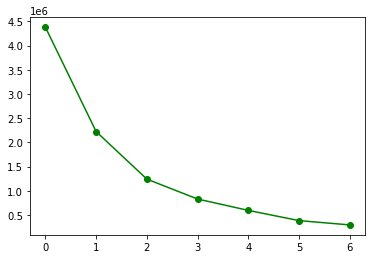

In [257]:
import sklearn
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Elbow-curve/SSD (Sum of squared distances)

SSD = []
range_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    SSD.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(SSD, '-go')

The highest gains occur for up to 3 clusters. Now, we can generate a model with 3 clusters and compare with the UCI results.

Another metric that helps us judge the best number of clusters is the silhouette score, which ranges from -1 to 1. Scores close to 1 suggests similarity among data points, whereas scores close to -1 suggests the opposite. It is worth keeping in mind that the lower the number of clusters, the higher the silhouette score is; therefore, this measure alone might not be the most helpful.

For n_clusters = 2 The average silhouette_score is : 0.19101992429715653
For n_clusters = 3 The average silhouette_score is : 0.11476498081858115
For n_clusters = 4 The average silhouette_score is : 0.028298535992755402
For n_clusters = 5 The average silhouette_score is : 0.006047107463811384
For n_clusters = 6 The average silhouette_score is : -0.014593494176796831


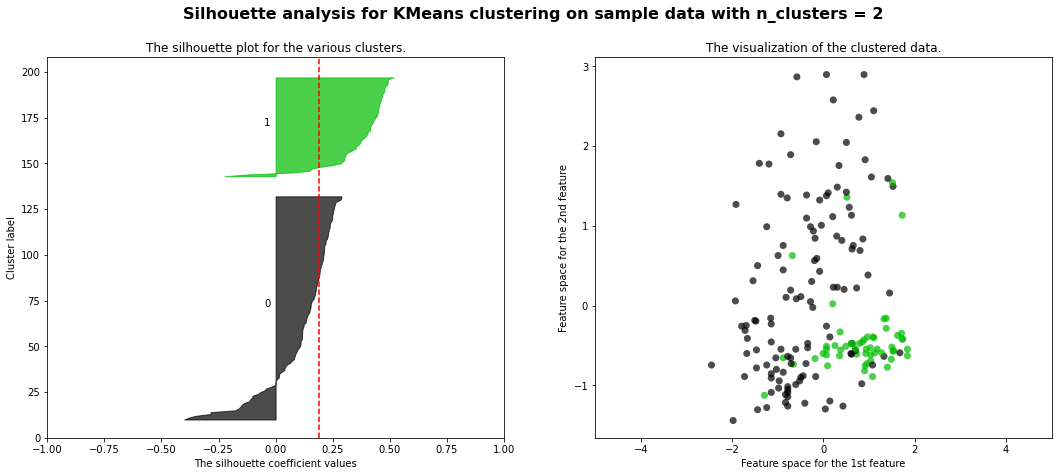

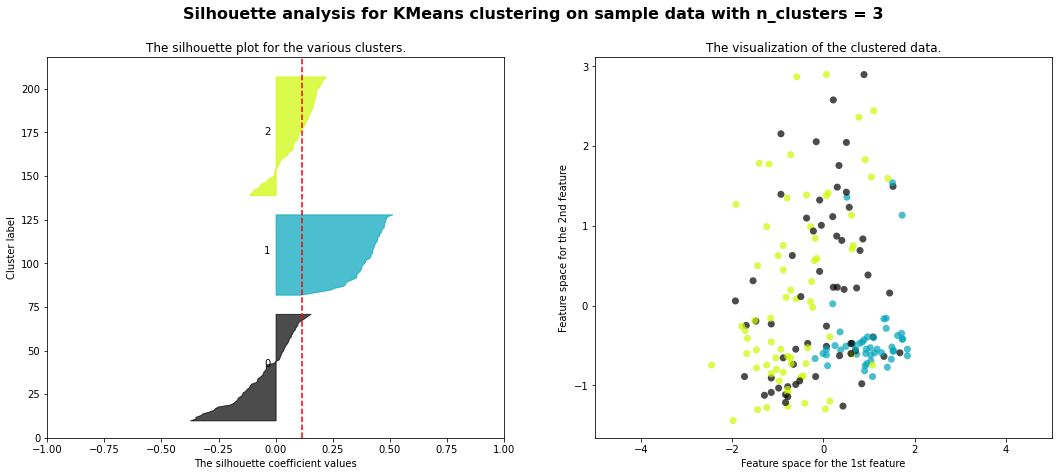

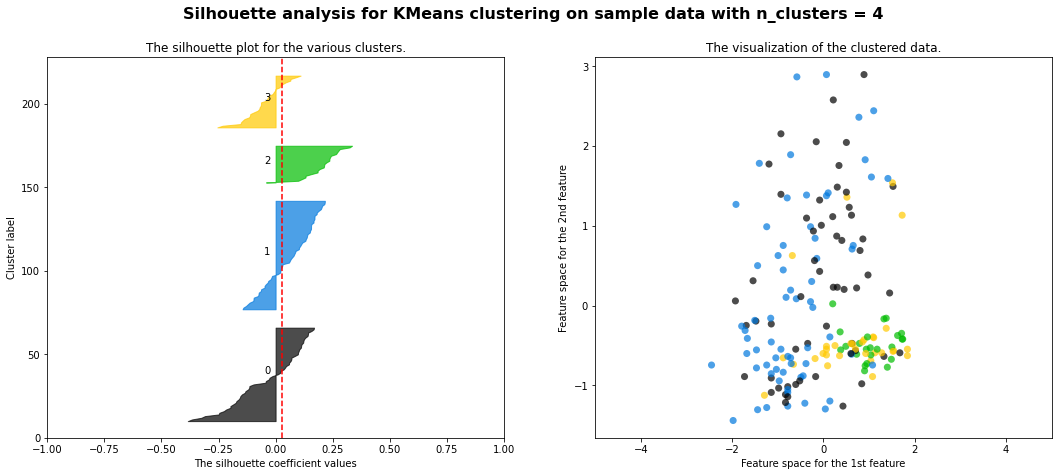

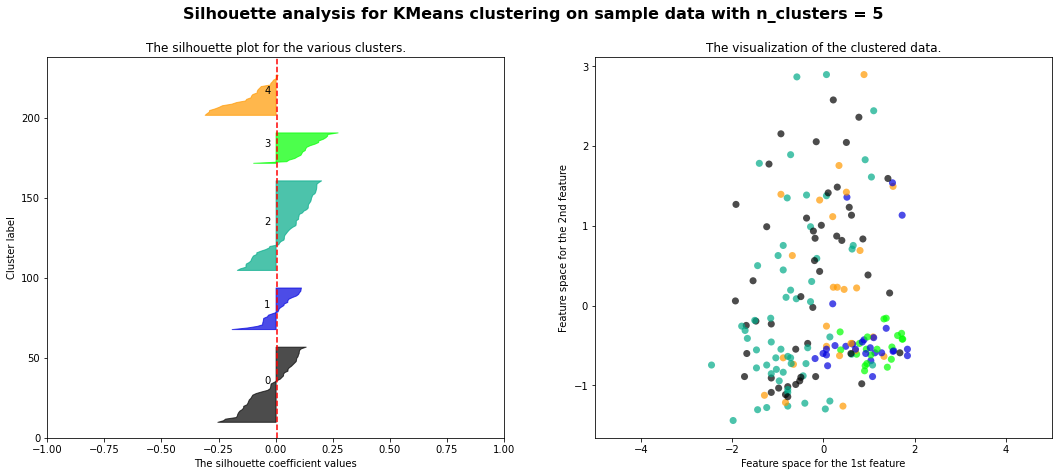

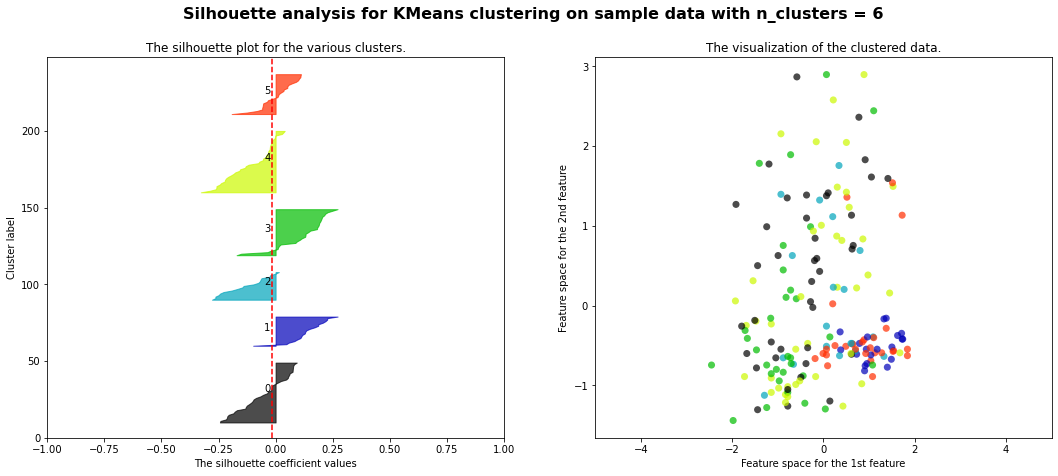

In [276]:
# code from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    ax2.set_xlim([-5, 5])

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=16, fontweight='bold')

plt.show()

In [181]:
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

[Text(0.5, 1.0, 'K-means classification')]

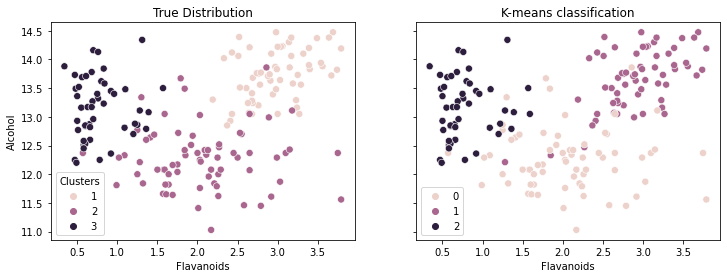

In [182]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))

sns.scatterplot(x=df.Flavanoids, y=df.Alcohol, hue= df['Clusters'], ax = ax1, s=50). set(title='True Distribution')
sns.scatterplot(x=df.Flavanoids, y=df.Alcohol, hue= clustering.labels_, ax = ax2, s=50). set(title='K-means classification')


Labels need to be renamed so that the colors and numbers match. Comparisons can't be made if the clusters are named differently.

In [183]:
print(clustering.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [184]:
# rename cluster labels

clustering.labels_ = np.where(clustering.labels_ ==2, 3, clustering.labels_)
clustering.labels_ = np.where(clustering.labels_==0, 2, clustering.labels_)
print(clustering.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1
 2 2 2 2 1 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


[Text(0.5, 1.0, 'K-means distribution')]

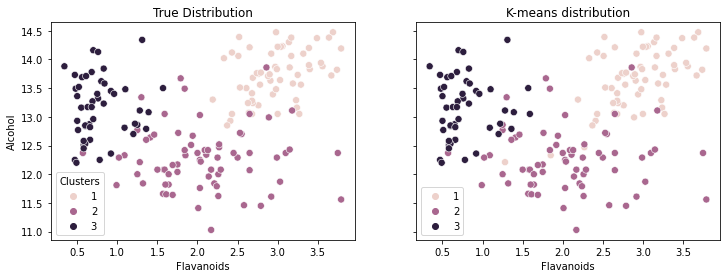

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))

sns.scatterplot(x=df.Flavanoids, y=df.Alcohol, hue= df['Clusters'], ax = ax1, s=50). set(title='True Distribution')
sns.scatterplot(x=df.Flavanoids, y=df.Alcohol, hue= clustering.labels_, ax = ax2, s=50). set(title='K-means distribution')

## Evaluate model

The model can be evaluated based on the clusters provided by the dataset (see original UCI dataset).

In [186]:
print(classification_report(y, clustering.labels_))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        59
           2       0.99      0.93      0.96        71
           3       0.98      0.98      0.98        48

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



Precision, recal, and accuracy are all above .9, suggesting that this model approximates the model suggested by UCI.

## Check the characteristics of each cluster

If you want to explore what differentiates the clusters, you can build boxplots. I will work with a few var just to illustrate.

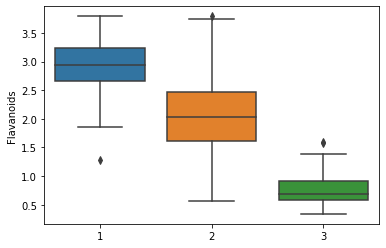

In [205]:
sns.boxplot(x=clustering.labels_, y="Flavanoids", data=df)

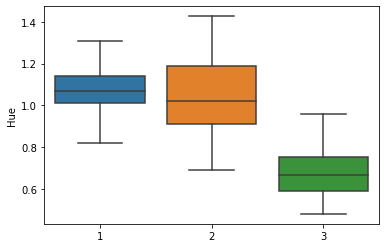

In [206]:
sns.boxplot(x=clustering.labels_, y="Hue", data=df)

The first cluster includes wine with higher levels of flavanoids and Hue, whereas the third cluster includes wine with lower favanoids and Hue levels.